Punto 1 

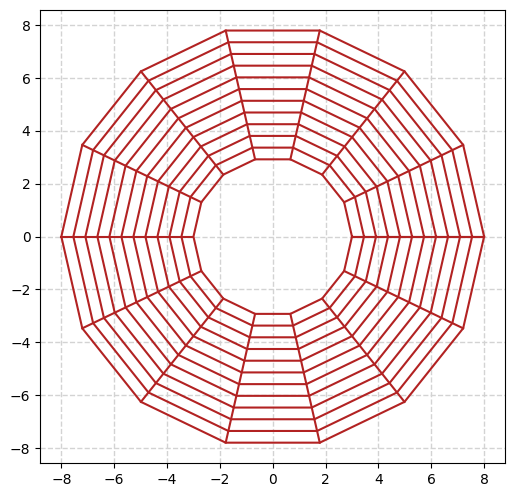

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
nth = 15
nr = 12
r_inf = 3
r_sup = 8

t_dis = np.linspace(0, (2*np.pi), nth)           #Discretizacion de los Angulos
r_dis = np.linspace(r_inf, r_sup, nr)           #Discretizacion de los radios

th, r = np.meshgrid(t_dis, r_dis)            #Malla

x_s = r * np.cos(th)                         #Convercion a carteciano (grafica)
y_s = r* np.sin(th)                         #Convercion a carteciano (grafica)



#-------------------------------------------------------------------------------Grafica-------------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 6))

for i in range(nr):
    ax.plot(x_s[i], y_s[i], color='firebrick')

for j in range(nth):
    ax.plot(x_s[:, j], y_s[:, j], color='firebrick')
ax.set_aspect('equal')  
ax.grid(color='lightgray', linestyle='--', linewidth=1)
plt.show()

Punto 2

Delta X: 2.0
Delta Y: 2.0 

------------------------------------------------------------
Seccion de pruebas

Puntos [(-8.0, -4.0), (-8.0, -2.0), (-8.0, 0.0), (-8.0, 2.0), (-8.0, 4.0), (-6.0, -6.0), (-6.0, -4.0), (-6.0, -2.0), (-6.0, 0.0), (-6.0, 2.0), (-6.0, 4.0), (-6.0, 6.0), (-4.0, -8.0), (-4.0, -6.0), (-4.0, -4.0), (-4.0, -2.0), (-4.0, 0.0), (-4.0, 2.0), (-4.0, 4.0), (-4.0, 6.0), (-4.0, 8.0), (-2.0, -8.0), (-2.0, -6.0), (-2.0, -4.0), (-2.0, -2.0), (-2.0, 0.0), (-2.0, 2.0), (-2.0, 4.0), (-2.0, 6.0), (-2.0, 8.0), (0.0, -8.0), (0.0, -6.0), (0.0, -4.0), (0.0, -2.0), (0.0, 2.0), (0.0, 4.0), (0.0, 6.0), (0.0, 8.0), (2.0, -8.0), (2.0, -6.0), (2.0, -4.0), (2.0, -2.0), (2.0, 0.0), (2.0, 2.0), (2.0, 4.0), (2.0, 6.0), (2.0, 8.0), (4.0, -8.0), (4.0, -6.0), (4.0, -4.0), (4.0, -2.0), (4.0, 0.0), (4.0, 2.0), (4.0, 4.0), (4.0, 6.0), (4.0, 8.0), (6.0, -6.0), (6.0, -4.0), (6.0, -2.0), (6.0, 0.0), (6.0, 2.0), (6.0, 4.0), (6.0, 6.0), (8.0, -4.0), (8.0, -2.0), (8.0, 0.0), (8.0, 2.0), (8.0, 4.0)]
segundo

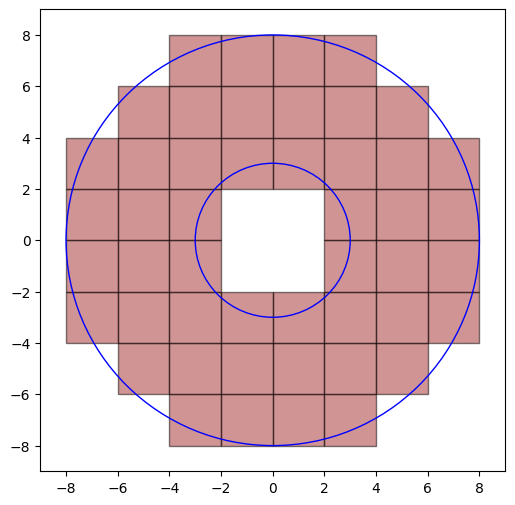

In [3]:
from collections import OrderedDict
import meshio 
nx =9
ny = 9

r_inf = 3
r_sup = 8

x_new = []
y_new = []
elemento = []
P_totales = []

puntos = []
puntos2 = []

x_dis = np.linspace(-r_sup, r_sup, nx)           #Discretizacion del eje X
y_dis = np.linspace(-r_sup, r_sup, ny)           #Discretizacion del eje Y 
delx = np.abs(x_dis[0] - x_dis[1])               #Paso de x
dely = np.abs(y_dis[0] - y_dis[1])               #paso de y 

print('Delta X:',delx)
print(f'Delta Y: {dely} \n')



for i in range(ny):
    for j in range(nx):
        P_totales.append([x_dis[j], y_dis[i]])


for i in range(len(P_totales)-nx-1):
    if ( (i+1)%(nx) != 0 and r_inf<=np.sqrt((((P_totales[i][0]+P_totales[i+1][0])/2)**2) + (((P_totales[i][1] + P_totales[i+nx][1])/2)**2))<=r_sup):
        
        A = [P_totales[i][0], P_totales[i][1]]
        B = [P_totales[i+1][0], P_totales[i+1][1]]
        C = [P_totales[i+1+nx][0], P_totales[i+1+nx][1]]
        D = [P_totales[i+nx][0], P_totales[i+nx][1]]
        elemento.append([A,B,C,D])
        puntos.extend([A,B,C,D])
puntos = list(OrderedDict.fromkeys(map(tuple, puntos)))
puntos.sort()



 

print('------------------------------------------------------------')
print('Seccion de pruebas\n')

print('Puntos', puntos)
print('segundo elemento',elemento[1])

print('\n------------------------------------------------------------')



#-------------------------------------------------------------------------------Grafica-------------------------------------------------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(6, 6))
circle_inf = plt.Circle((0, 0), r_inf, color='blue', fill=False)
circle_sup = plt.Circle((0, 0), r_sup, color='blue', fill=False)

for element in elemento:
    square = Polygon(element, edgecolor='black', facecolor='brown', alpha=0.5)
    plt.gca().add_patch(square)


ax2.set_xlim(-r_sup - 1, r_sup + 1)
ax2.set_ylim(-r_sup - 1, r_sup + 1)
ax2.add_artist(circle_inf)
ax2.add_artist(circle_sup)
ax2.grid(color='lightgray', linestyle='none', linewidth=1)  
plt.show()
